In [1]:
from toptica_ophyd import LaserToptica

In [2]:
LTDLC = LaserToptica(prefix="...",name="LTDLC", host="129.129.131.136")
# LTDLC.stage()
# print(LTDLC.read())

# print(LTDLC.get())
# print(LTDLC.describe())


connecting to 129.129.131.136


In [3]:
print(LTDLC.read())

OrderedDict([('LTDLC_scan_end', {'value': 14.0, 'timestamp': 1685970512.9037304}), ('LTDLC_scan_start', {'value': 12.88000000000001, 'timestamp': 1685970512.9037304}), ('LTDLC_scan_offset', {'value': 13.440000000000005, 'timestamp': 1685970512.9037304}), ('LTDLC_scan_frequency', {'value': 14.000045970741974, 'timestamp': 1685970512.9037304}), ('LTDLC_ctl_wavelength_act', {'value': 1610.000091195112, 'timestamp': 1685970512.9037304})])


In [4]:
LTDLC.summary()

data keys (* hints)
-------------------
*LTDLC_ctl_wavelength_act
*LTDLC_scan_end
*LTDLC_scan_frequency
*LTDLC_scan_offset
*LTDLC_scan_start

read attrs
----------
scan_end             LaserMainScanEnd    ('LTDLC_scan_end')
scan_start           LaserMainScanStart  ('LTDLC_scan_start')
scan_offset          LaserMainScanOffset ('LTDLC_scan_offset')
scan_frequency       LaserMainScanFrequency('LTDLC_scan_frequency')
ctl_wavelength_act   LaserMainCtlWavelengthAct('LTDLC_ctl_wavelength_act')

config keys
-----------

configuration attrs
-------------------

unused attrs
------------
low_limit_wavelength Signal              ('LTDLC_low_limit_wavelength')



In [5]:
from bluesky import RunEngine
from bluesky.plans import count
from bluesky.callbacks.best_effort import BestEffortCallback
RE = RunEngine({})
bec = BestEffortCallback()

# Send all metadata/data captured to the BestEffortCallback.
RE.subscribe(bec)
from databroker import Broker
import databroker
# db = Broker.named('temp')

# Insert all metadata/data captured into db.
# RE.subscribe(db.insert)
catalog = databroker.catalog['LASER_TOPTICA']
RE.subscribe(catalog.v1.insert)


c:\Users\DanielM\anaconda3\envs\psi-bluesky\lib\site-packages\pims\image_reader.py:26: RuntimeWarning: PIMS image_reader.py could not find scikit-image. Falling back to matplotlib's imread(), which uses floats instead of integers. This may break your scripts. 
(To ignore this warning, include the line "warnings.simplefilter("ignore", RuntimeWarning)" in your script.)
  warnings.warn(RuntimeWarning(ski_preferred))


1

In [6]:
from bluesky.plan_stubs import mvr, mv
# wavelength and freq has a problem
RE(mv(LTDLC.scan_end, 14))

()



Transient Scan ID: 1     Time: 2023-06-05 15:09:23
Persistent Unique Scan ID: '57ed5d25-ce13-4aa4-babb-52a347afb441'
New stream: 'primary'
+-----------+------------+----------------+------------------+-------------------+----------------------+--------------------------+
|   seq_num |       time | LTDLC_scan_end | LTDLC_scan_start | LTDLC_scan_offset | LTDLC_scan_frequency | LTDLC_ctl_wavelength_act |
+-----------+------------+----------------+------------------+-------------------+----------------------+--------------------------+
|         1 | 15:09:24.4 |         14.000 |           12.880 |            13.440 |               14.000 |                 1610.000 |
|         2 | 15:09:25.5 |         14.000 |           12.880 |            13.440 |               14.000 |                 1610.000 |
|         3 | 15:09:26.8 |         14.000 |           12.880 |            13.440 |               14.000 |                 1610.000 |
|         4 | 15:09:28.1 |         14.000 |           12.880 

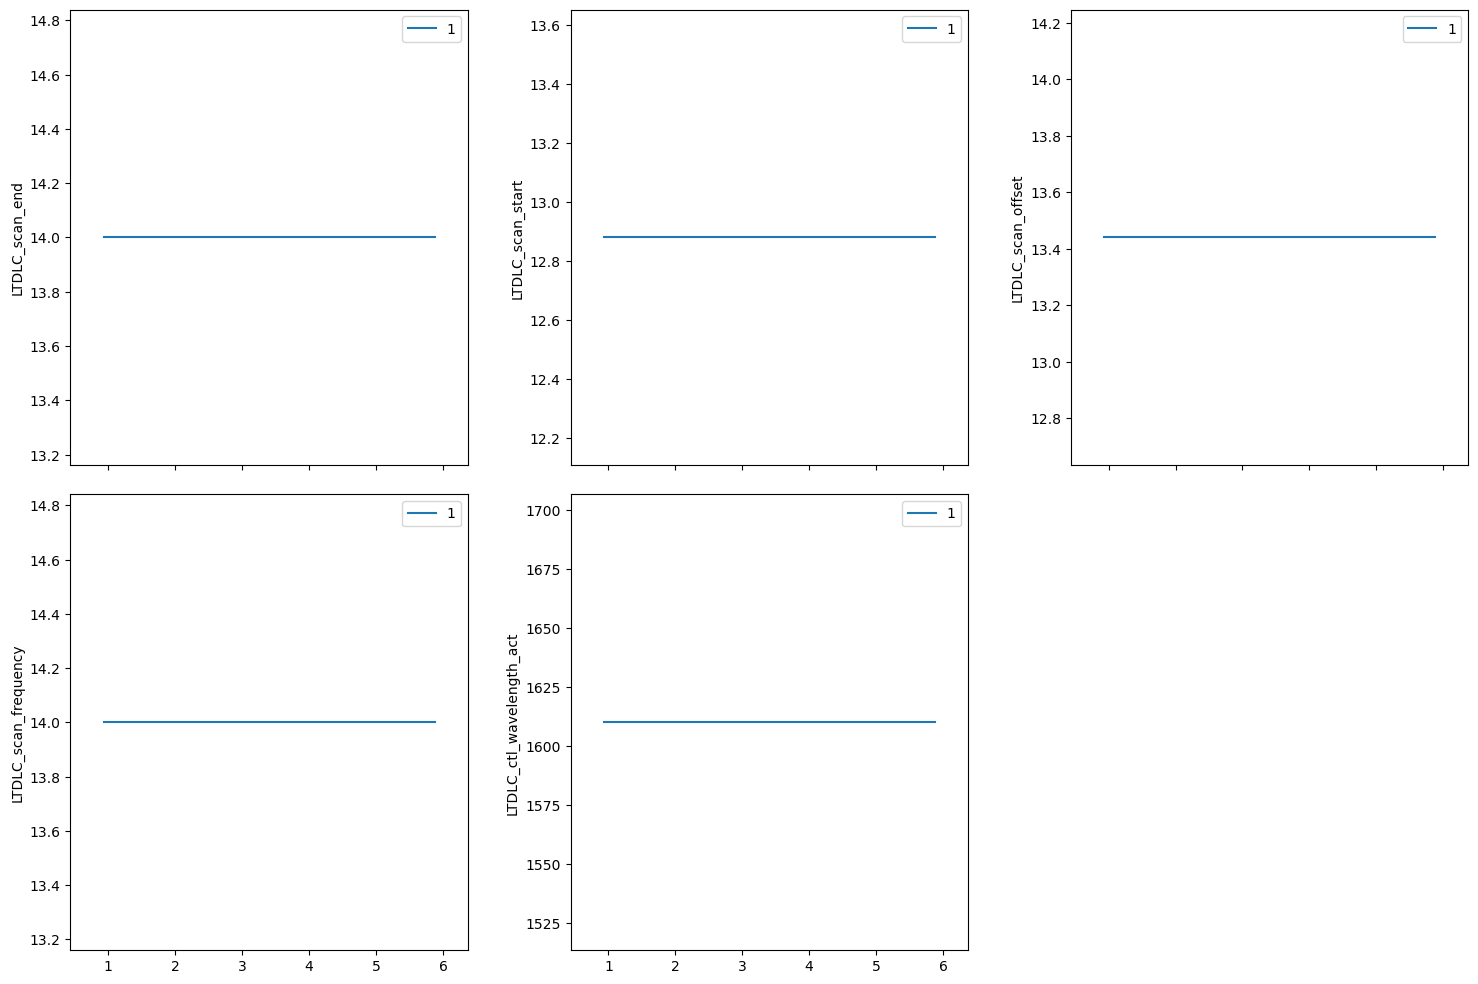

In [7]:
# from functools import partial
# laser_count = partial(count, [LTDLC])
# countDLC, = RE(laser_count(num=5,delay=1))
# from bluesky.callbacks.mpl_plotting import LivePlot

countDLC, = RE(count([LTDLC],num=5,delay=1))
# countDLC, = RE(count([LTDLC],num=5,delay=1, LivePlot('LTDLC_scan_end', 'LTDLC_scan_start')))

In [8]:
header = catalog[countDLC]

In [11]:
list(header)

['primary']

In [12]:
ds = header.primary.read()

In [16]:
ds.head()

<xarray.Dataset>
Dimensions:                   (time: 5)
Coordinates:
  * time                      (time) float64 1.686e+09 1.686e+09 ... 1.686e+09
Data variables:
    LTDLC_scan_end            (time) float64 14.0 14.0 14.0 14.0 14.0
    LTDLC_scan_start          (time) float64 12.88 12.88 12.88 12.88 12.88
    LTDLC_scan_offset         (time) float64 13.44 13.44 13.44 13.44 13.44
    LTDLC_scan_frequency      (time) float64 14.0 14.0 14.0 14.0 14.0
    LTDLC_ctl_wavelength_act  (time) float64 1.61e+03 1.61e+03 ... 1.61e+03

In [17]:
from bluesky.preprocessors import SupplementalData

sd = SupplementalData()
sd.baseline = [LTDLC.scan_end]
RE.preprocessors.append(sd)



Transient Scan ID: 2     Time: 2023-06-05 15:17:42
Persistent Unique Scan ID: '5a3f441a-6c48-4def-89f0-b59ca5b67b04'
New stream: 'baseline'
Start-of-run baseline readings:
+--------------------------------+--------------------------------+
|                 LTDLC_scan_end | 14.0                           |
+--------------------------------+--------------------------------+
New stream: 'primary'
+-----------+------------+----------------+------------------+-------------------+----------------------+--------------------------+
|   seq_num |       time | LTDLC_scan_end | LTDLC_scan_start | LTDLC_scan_offset | LTDLC_scan_frequency | LTDLC_ctl_wavelength_act |
+-----------+------------+----------------+------------------+-------------------+----------------------+--------------------------+
|         1 | 15:17:43.3 |         14.000 |           12.880 |            13.440 |               14.000 |                 1610.000 |
|         2 | 15:17:44.5 |         14.000 |           12.880 |      

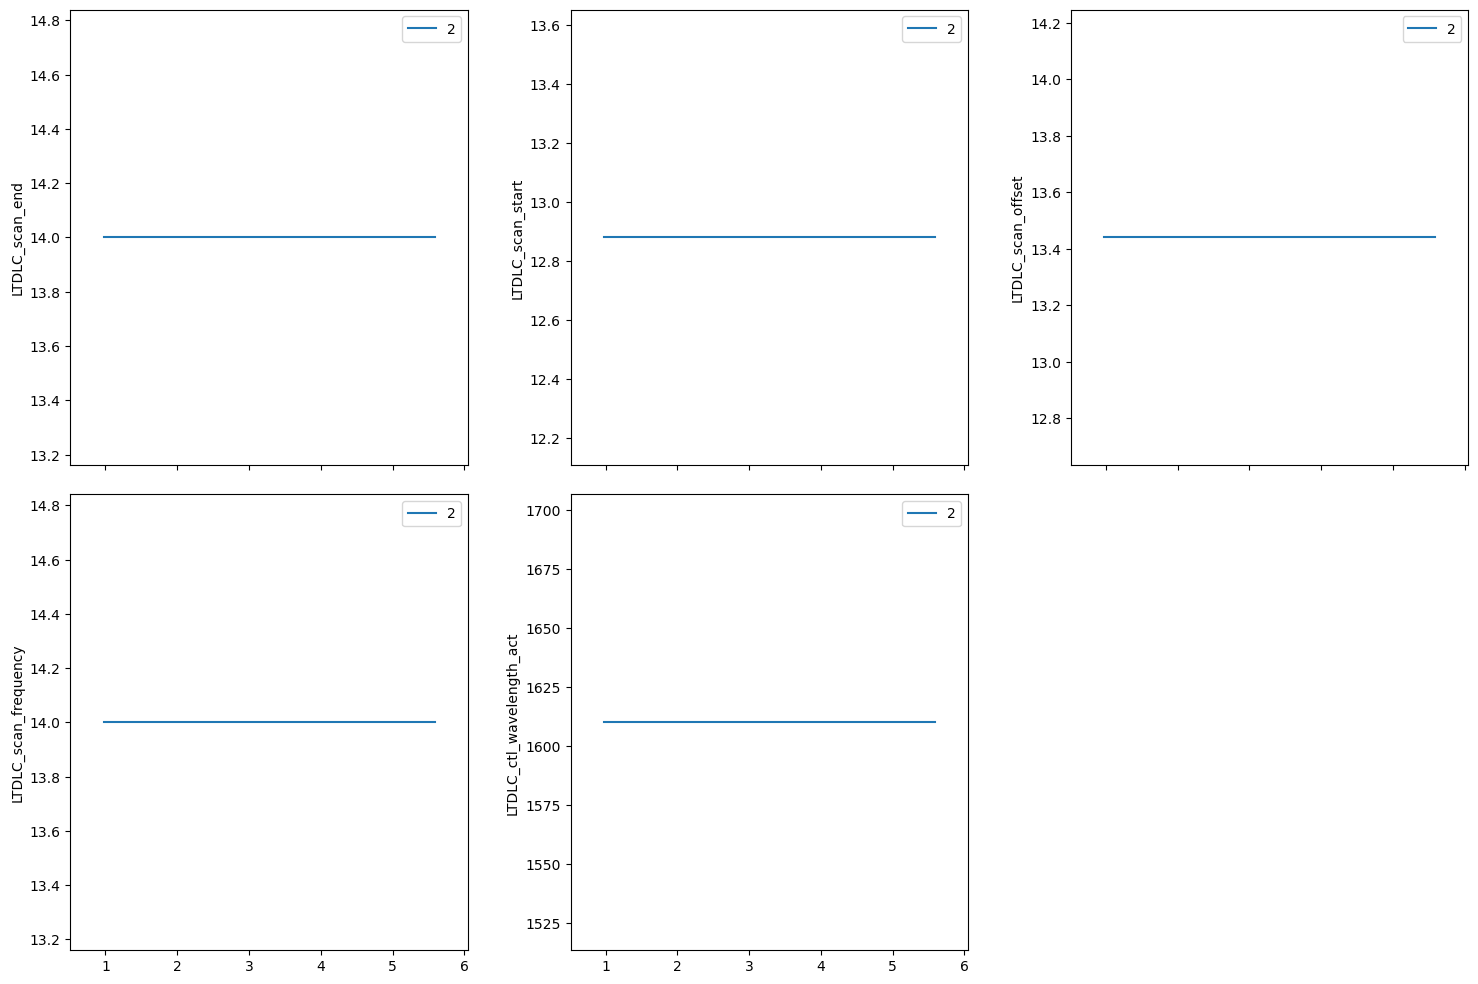

In [18]:
countDLC, = RE(count([LTDLC],num=5,delay=1))

In [20]:
header = catalog[countDLC]
list(header)

['baseline', 'primary']

In [21]:
ds1 = header.baseline.read()

In [22]:
ds1.head()

<xarray.Dataset>
Dimensions:         (time: 2)
Coordinates:
  * time            (time) float64 1.686e+09 1.686e+09
Data variables:
    LTDLC_scan_end  (time) float64 14.0 14.0

In [16]:
# import bluesky.plans as bp
# from bluesky.plan_stubs import mv

# def load_sample(LTDLC):
# #     yield from mv(LTDLC.scan_offset, 0)
# #     yield from mv(LTDLC.ctl_wavelength_act, 1550)
#     yield from mv(LTDLC.scan_end, 70)
#     yield from mv(LTDLC.scan_start, 50)
#     yield from mv(LTDLC.scan_frequency, 10)

# def laser_plan():
#     # load the sample
#     yield from load_sample(LTDLC)
#     # take a measurement
# #     yield from bp.count([LTDLC])

In [23]:
LTDLC.unstage()

[LaserToptica(prefix='...', name='LTDLC', read_attrs=['scan_end', 'scan_start', 'scan_offset', 'scan_frequency', 'ctl_wavelength_act'], configuration_attrs=[])]